In [ ]:
!pip install transformers

In [2]:
import numpy as np
import pandas as pd

train_data = pd.read_csv('train.csv') # 2834 rows, 6 cols
test_data = pd.read_csv('test.csv')   #    7 rows, 4 cols

target = train_data['target'].to_numpy()

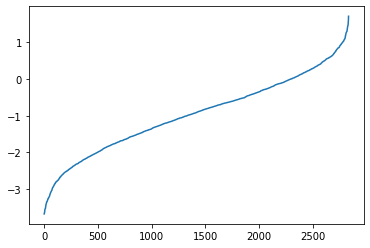

In [ ]:
import matplotlib.pyplot as plt
plt.plot(np.sort(target))

In [ ]:
from transformers import BertTokenizer, BertModel
import torch

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained("bert-base-uncased")

#i = 0
#train_embeddings = list()
#for excerpt in train_data['excerpt']:
#    encoded_input = tokenizer(excerpt, return_tensors='pt')
#    output = model(**encoded_input)
#    train_embeddings.extend(output['last_hidden_state'][:,0].detach().numpy())
#    if i%100 == 0:
#        print(i)
#    i += 1
## Save embeddings
#np.save(f'train_embeddings_bert_uncased', train_embeddings)

train_embeddings_bert_uncased = np.load('train_embeddings_bert_uncased.npy')
train_embeddings_bert_cased = np.load('train_embeddings_bert_cased.npy')

# BERT-uncased

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

reg = LinearRegression()
scores = cross_val_score(reg, train_embeddings_bert_uncased, target, cv=5, scoring='neg_root_mean_squared_error')
print(scores)
print(np.average(scores))

[-0.72706851 -0.76652945 -0.68880734 -0.70817172 -0.70991403]
-0.7200982093825152


In [5]:
from sklearn.svm import SVR

svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
scores = cross_val_score(svr_rbf, train_embeddings_bert_uncased, target, cv=5, scoring='neg_root_mean_squared_error')
print(scores)
print(np.average(scores))

[-0.85750959 -1.12014147 -1.07072126 -1.13007484 -0.87799757]
-1.0112889463046226


# BERT-cased

In [6]:
reg = LinearRegression()
scores = cross_val_score(reg, train_embeddings_bert_cased, target, cv=5, scoring='neg_root_mean_squared_error')
print(scores)
print(np.average(scores))

[-0.69231777 -0.80121912 -0.73203562 -0.7345795  -0.73260188]
-0.7385507779024574


In [7]:
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
scores = cross_val_score(svr_rbf, train_embeddings_bert_cased, target, cv=5, scoring='neg_root_mean_squared_error')
print(scores)
print(np.average(scores))

[-0.65624737 -0.72307258 -0.69802603 -0.72910269 -0.66428342]
-0.6941464184218323


# Predict Test Set

In [8]:
test_embeddings = list()
for excerpt in test_data['excerpt']:
    encoded_input = tokenizer(excerpt, return_tensors='pt')
    output = model(**encoded_input)
    test_embeddings.extend(output['last_hidden_state'][:,0].detach().numpy())

In [9]:
# Train with all training set
reg.fit(train_embeddings_bert_uncased, target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
test_data['target'] = reg.predict(test_embeddings)
submission = test_data[['id', 'target']]
submission.to_csv('submission.csv', index=False)